In [432]:
import requests 
from bs4 import BeautifulSoup
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
pd.set_option("display.max_rows", None, "display.max_columns", None)


In [433]:
# Part 1 Step 1
# Reading the data
r = requests.get("https://cmsc320.github.io/files/top-50-solar-flares.html")


In [434]:
# Parsing the data
soup = BeautifulSoup(r.text, 'html.parser')


In [435]:
# Assigning data to the data frame after removing tags 
df = pd.DataFrame(columns=['rank','x_classification','date','region','start_time','maximum_time','end_time','movie'])
l = soup.find('tbody')
lst = l.find_all('tr')
lst2 = []
for items in lst:
    p = (items.find_all('td'))
    for x in p:
        lst2.append(x.get_text())
    df.loc[len(df)] = lst2
    lst2 = []

In [436]:
# Result after part 1 step 1
display(df)

,rank,x_classification,date,region,start_time,maximum_time,end_time,movie
0,1,X28+,2003/11/04,0486,19:29,19:53,20:06,MovieView archive
1,2,X20+,2001/04/02,9393,21:32,21:51,22:03,MovieView archive
2,3,X17.2+,2003/10/28,0486,09:51,11:10,11:24,MovieView archive
3,4,X17+,2005/09/07,0808,17:17,17:40,18:03,MovieView archive
4,5,X14.4,2001/04/15,9415,13:19,13:50,13:55,MovieView archive
5,6,X10,2003/10/29,0486,20:37,20:49,21:01,MovieView archive
6,7,X9.4,1997/11/06,8100,11:49,11:55,12:01,MovieView archive
7,8,X9.3,2017/09/06,2673,11:53,12:02,12:10,MovieView archive
8,9,X9,2006/12/05,0930,10:18,10:35,10:45,MovieView archive
9,10,X8.3,2003/11/02,0486,17:03,17:25,17:39,MovieView archive


In [437]:
# Part 1 Step 2
# Dropping the last column
df = df.iloc[: , :-1]

In [438]:
# Dropping the original time columns and adding datetime columns
start = pd.to_datetime(df['date'] + ' ' + df['start_time'])
maxi = pd.to_datetime(df['date'] + ' ' + df['maximum_time'])
end = pd.to_datetime(df['date'] + ' ' + df['end_time'])
df['start_tme'] = start
df['max_tme'] = maxi
df['end_tme'] = end
df = df.drop('start_time',axis=1)
df = df.drop('maximum_time',axis=1)
df = df.drop('end_time',axis=1)

In [439]:
# Result after part 1 step 2
display(df)

,rank,x_classification,date,region,start_tme,max_tme,end_tme
0,1,X28+,2003/11/04,0486,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00
1,2,X20+,2001/04/02,9393,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00
2,3,X17.2+,2003/10/28,0486,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00
3,4,X17+,2005/09/07,0808,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00
4,5,X14.4,2001/04/15,9415,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00
5,6,X10,2003/10/29,0486,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00
6,7,X9.4,1997/11/06,8100,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00
7,8,X9.3,2017/09/06,2673,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00
8,9,X9,2006/12/05,0930,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00
9,10,X8.3,2003/11/02,0486,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00


In [440]:
q = requests.get('https://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2_description.htm')
soup = BeautifulSoup(q.text, 'html.parser')
w = soup.find(class_="Section1")
txt = w.get_text()
print(txt)


The Wind/WAVES type II burst
catalog: A brief description
 
URL: http://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html.  
This is a catalog of type II
bursts observed by the  Radio and Plasma
Wave (WAVES) experiment on board the Wind spacecraft and the associated coronal
mass ejections (CMEs) observed by the Solar and Heliospheric Observatory (SOHO)
mission.  The type II burst catalog is
derived from the Wind/WAVES catalog available at http://lep694.gsfc.nasa.gov/waves/waves.html
by adding a few missing events. 
The CMEs in this catalog are
called radio-loud CMEs because of their ability to produce type II radio bursts.
The CME sources are also listed, as derived from the Solar Geophysical Data
listing or from inner coronal images such as Yohkoh/SXT and SOHO/EIT.  Some solar sources have also been obtained
from Solarsoft Latest Events Archive after October 1, 2002: http://www.lmsal.com/solarsoft/latest_events_archive.html
 
Explanation of catalog entries:
Column 1:  Starting date 

In [441]:
# Part 1 Step 3 Scrape the NASA table 
# Reading and parsing the data
k = requests.get('https://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html')
soup = BeautifulSoup(k.text, 'html.parser')

In [442]:
# Obtained each row of data as a long string and sliced to create data row 
# for values that are time 24:00, the date was changed to the next day and time changed to 00:00
# Recoded missing entries '-----' and '----' as NaN
# Indicates Halo flare or not 
# Indicates lower bound and removes non numeric chars
lst3 = []
is_halo = []
lower_bound = []
c = 0
df2 = pd.DataFrame(columns=['start_date','start_time','end_date','end_time','start_frequency','end_frequency','flare_location','flare_region','flare_classification', 'cme_date','cme_time','cme_angle','cme_width','cme_speed'])
for line in soup.get_text().split("\n"):
    if line != '' and c > 14:
        c2 = 0
        lst3 = []
        for items in line.split():
            if c2 == 0:
                strtemp = items
            if c2 == 2:
                items = strtemp[:5] + items
            if c2 == 3:
                if items == '24:00':
                    items = '00:00'
                    lst3[2] = (lst3[2][:8]) + str(int(lst3[2][8] + lst3[2][9]) + 1)
            if c2 == 9:
                    items = strtemp[:5] + items
            if c2 == 11:
                if items == 'Halo':
                    items = 'NA'
                    is_halo.append(True)
                else:
                    is_halo.append(False)
            if c2 == 12:
                if '>' in items:
                    lower_bound.append(True)
                    items = items[1:]
                else:
                    lower_bound.append(False)
            if c2 < 14:
                if items == '----':
                    items = 'NaN'
                lst3.append(items.replace('-----','NaN'))
            c2 += 1
        if len(lst3) == 14:
            df2.loc[len(df2)] = lst3
    c += 1
df2['is_halo'] = is_halo
df2['lower_bound'] = lower_bound


In [443]:
# Result of part 1 step 3 
display(df2)

,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_date,cme_time,cme_angle,cme_width,cme_speed,is_halo,lower_bound
0,1997/04/01,14:00,1997/04/01,14:15,8000,4000,S25E16,8026,M1.3,1997/04/01,15:18,74,79,312,False,False
1,1997/04/07,14:30,1997/04/07,17:30,11000,1000,S28E19,8027,C6.8,1997/04/07,14:27,NA,360,878,True,False
2,1997/05/12,05:15,1997/05/14,16:00,12000,80,N21W08,8038,C1.3,1997/05/12,05:30,NA,360,464,True,False
3,1997/05/21,20:20,1997/05/21,22:00,5000,500,N05W12,8040,M1.3,1997/05/21,21:00,263,165,296,False,False
4,1997/09/23,21:53,1997/09/23,22:16,6000,2000,S29E25,8088,C1.4,1997/09/23,22:02,133,155,712,False,False
5,1997/11/03,05:15,1997/11/03,12:00,14000,250,S20W13,8100,C8.6,1997/11/03,05:28,240,109,227,False,False
6,1997/11/03,10:30,1997/11/03,11:30,14000,5000,S16W21,8100,M4.2,1997/11/03,11:11,233,122,352,False,False
7,1997/11/04,06:00,1997/11/05,04:30,14000,100,S14W33,8100,X2.1,1997/11/04,06:10,NA,360,785,True,False
8,1997/11/06,12:20,1997/11/07,08:30,14000,100,S18W63,8100,X9.4,1997/11/06,12:10,NA,360,1556,True,False
9,1997/11/27,13:30,1997/11/27,14:00,14000,7000,N17E63,8113,X2.6,1997/11/27,13:56,98,91,441,False,False


In [444]:
# Part 1 Step 4 Tidy the NASA Table
# Combine date and time as time objects 
# Created new cols and dropped old
s = pd.to_datetime(df2['start_date'] + ' ' + df2['start_time'])
df2 = df2.drop('start_date',axis=1)
df2 = df2.drop('start_time',axis=1)
df2.insert(loc=0,column='start_datetime',value=s)

e = pd.to_datetime(df2['end_date'] + ' ' + df2['end_time'])
df2 = df2.drop('end_date',axis=1)
df2 = df2.drop('end_time',axis=1)
df2.insert(loc=1,column='end_datetime',value=e)

# Assumption: the data is "2000/--/-- --"" no date and time is present to work with which is why i used errors='coerce' (NaT)
# For other instances where i had a day and month but no year i added the year
# I believe I did not remove any data 
cme = pd.to_datetime(df2['cme_date'] + ' ' + df2['cme_time'],errors='coerce')
df2 = df2.drop('cme_date',axis=1)
df2 = df2.drop('cme_time',axis=1)
df2.insert(loc=8,column='cme_datetime',value=cme)


In [445]:
# Result after part 1 step 4
display(df2)

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_angle,cme_datetime,cme_width,cme_speed,is_halo,lower_bound
0,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,74,1997-04-01 15:18:00,79,312,False,False
1,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,NA,1997-04-07 14:27:00,360,878,True,False
2,1997-05-12 05:15:00,1997-05-14 16:00:00,12000,80,N21W08,8038,C1.3,NA,1997-05-12 05:30:00,360,464,True,False
3,1997-05-21 20:20:00,1997-05-21 22:00:00,5000,500,N05W12,8040,M1.3,263,1997-05-21 21:00:00,165,296,False,False
4,1997-09-23 21:53:00,1997-09-23 22:16:00,6000,2000,S29E25,8088,C1.4,133,1997-09-23 22:02:00,155,712,False,False
5,1997-11-03 05:15:00,1997-11-03 12:00:00,14000,250,S20W13,8100,C8.6,240,1997-11-03 05:28:00,109,227,False,False
6,1997-11-03 10:30:00,1997-11-03 11:30:00,14000,5000,S16W21,8100,M4.2,233,1997-11-03 11:11:00,122,352,False,False
7,1997-11-04 06:00:00,1997-11-05 04:30:00,14000,100,S14W33,8100,X2.1,NA,1997-11-04 06:10:00,360,785,True,False
8,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,NA,1997-11-06 12:10:00,360,1556,True,False
9,1997-11-27 13:30:00,1997-11-27 14:00:00,14000,7000,N17E63,8113,X2.6,98,1997-11-27 13:56:00,91,441,False,False


In [446]:
# Part 2 Question 1 Replication
# I was able to replicate the SpaceWeatherLive table, not exact though. 
# Some values are present from the NASA table that are not in the SpaceWeatherLive table and vice-versa 
# (Ex. X1.9 is present in the NASA table but not SWL).
# Ordering is the same X28 first then X20 and so on. 
df3 = pd.DataFrame(df2.sort_values(by=(['flare_classification']),ascending=False).head(50))
flare_lst = []
for items in df3['flare_classification']:
    flare_lst.append(float(items[1:]))
df3 = df3.drop('flare_classification',axis=1)
df3.insert(loc=6,column='flare_class',value=flare_lst)
df3 = pd.DataFrame(df3.sort_values(by=(['flare_class']),ascending=False))
flare_lst = []
for items in df3['flare_class']:
    stemp = 'X' +(str(items)[:3])
    if stemp[3] == '.':
        stemp = stemp[:3]
    flare_lst.append(stemp)
df3 = df3.drop('flare_class',axis=1)
df3.insert(loc=6,column='flare_classification',value=flare_lst)
display(df3)

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_angle,cme_datetime,cme_width,cme_speed,is_halo,lower_bound
240,2003-11-04 20:00:00,2003-11-05 00:00:00,10000,200,S19W83,10486,X28,NA,2003-11-04 19:54:00,360,2657,True,False
117,2001-04-02 22:05:00,2001-04-03 02:30:00,14000,250,N19W72,9393,X20,261,2001-04-02 22:06:00,244,2505,False,False
233,2003-10-28 11:10:00,2003-10-30 00:00:00,14000,40,S16E08,10486,X17,NA,2003-10-28 11:30:00,360,2459,True,False
126,2001-04-15 14:05:00,2001-04-16 13:00:00,14000,40,S20W85,9415,X14,245,2001-04-15 14:06:00,167,1199,False,False
234,2003-10-29 20:55:00,2003-10-30 00:00:00,11000,500,S15W02,10486,X10,NA,2003-10-29 20:54:00,360,2029,True,False
8,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,NA,1997-11-06 12:10:00,360,1556,True,False
514,2017-09-06 12:05:00,2017-09-07 08:00:00,16000,70,S08W33,12673,X9.3,NA,2017-09-06 12:24:00,360,1571,True,False
328,2006-12-05 10:50:00,2006-12-05 20:00:00,14000,250,S07E68,10930,X9.0,NaN,NaT,NaN,NaN,False,False
237,2003-11-02 17:30:00,2003-11-03 01:00:00,12000,250,S14W56,10486,X8.3,NA,2003-11-02 17:30:00,360,2598,True,False
515,2017-09-10 16:02:00,2017-09-11 06:50:00,16000,150,S09W92,NaN,X8.3,NA,2017-09-10 16:00:00,360,3163,True,False


In [447]:
# Part 2 Question 2
# Best Matching rows
# Best matching row means the x_classification appears in the same ranking location in both tables 
# and has the same start date. X28 and X20 are the best matching rows. 
flare_lst = []
x_lst = []
sd_lst = []
s_lst = []
for items in df3['flare_classification']:
    flare_lst.append(items)
for items in df['x_classification']:
    x_lst.append(items.replace('+',''))
for items in df3['start_datetime']:
    sd_lst.append(items.date())
for items in df['start_tme']:
    s_lst.append(items.date())
i = 0
while i < 50:
    if flare_lst[i] == x_lst[i] and sd_lst[i] == s_lst[i]:
        print(flare_lst[i])
    i += 1

X28
X20


In [448]:
#Part 2 Question 2
#To account for more than 1 SWL Entry best matching, 
#the one closest to the original rank in the SWL table is matched.
swl_rank = []
visited = []
i = 0
while i < 50: 
    rank = 0
    while rank < 50:
        if flare_lst[i] == x_lst[rank] and rank+1 not in visited:
            swl_rank.append(str(rank+1))
            visited.append(rank+1)
            break 
        if flare_lst[i] == x_lst[rank] and rank+1 in visited:
            p = 0
            min = abs((rank+1)-i)
            for items in swl_rank:
                if items == str(rank+1):
                    if abs((rank+1)-p) < min:
                        swl_rank[p] = 'None'
                        break
                if p == 49:
                    swl_rank.append(rank+1)
                p += 1
        if rank == 49:
            swl_rank.append('None')
        rank += 1
    i += 1
df3['SWL_Rank'] = swl_rank
display(df3)

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_angle,cme_datetime,cme_width,cme_speed,is_halo,lower_bound,SWL_Rank
240,2003-11-04 20:00:00,2003-11-05 00:00:00,10000,200,S19W83,10486,X28,NA,2003-11-04 19:54:00,360,2657,True,False,1
117,2001-04-02 22:05:00,2001-04-03 02:30:00,14000,250,N19W72,9393,X20,261,2001-04-02 22:06:00,244,2505,False,False,2
233,2003-10-28 11:10:00,2003-10-30 00:00:00,14000,40,S16E08,10486,X17,NA,2003-10-28 11:30:00,360,2459,True,False,4
126,2001-04-15 14:05:00,2001-04-16 13:00:00,14000,40,S20W85,9415,X14,245,2001-04-15 14:06:00,167,1199,False,False,None
234,2003-10-29 20:55:00,2003-10-30 00:00:00,11000,500,S15W02,10486,X10,NA,2003-10-29 20:54:00,360,2029,True,False,6
8,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,NA,1997-11-06 12:10:00,360,1556,True,False,7
514,2017-09-06 12:05:00,2017-09-07 08:00:00,16000,70,S08W33,12673,X9.3,NA,2017-09-06 12:24:00,360,1571,True,False,8
328,2006-12-05 10:50:00,2006-12-05 20:00:00,14000,250,S07E68,10930,X9.0,NaN,NaT,NaN,NaN,False,False,None
237,2003-11-02 17:30:00,2003-11-03 01:00:00,12000,250,S14W56,10486,X8.3,NA,2003-11-02 17:30:00,360,2598,True,False,10
515,2017-09-10 16:02:00,2017-09-11 06:50:00,16000,150,S09W92,NaN,X8.3,NA,2017-09-10 16:00:00,360,3163,True,False,None


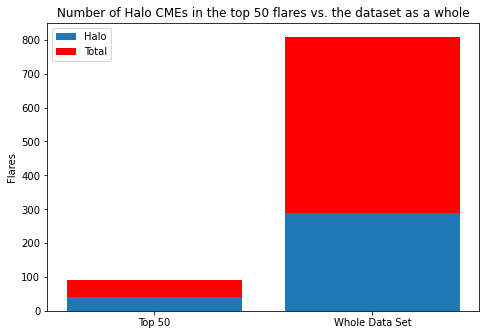

In [449]:
# Part 2 Question 3
# The plot shows that a higher porportion of flares in the Top 50 have Halo CME's 
# Count the number of Halo flare's in the Top 50 (blue), Top 50 (Red)
# Count the number of Halo flare's in the total data set (blue), Whole data set (red)
count = 0
for elem in df3['is_halo']:
    if elem == True:
        count += 1
count2 = 0
for elem in df2['is_halo']:
    if elem == True:
        count2 += 1
fig = plt.figure()
ax = fig.add_axes([10,0,1,1])
vals = [count,count2]
l = [len(df3),len(df2)]
names = ['Top 50', 'Whole Data Set']
ax.bar(names,vals)
ax.bar(names, l,bottom=vals, color='r')
ax.legend(labels=['Halo','Total'])
ax.set_ylabel('Flares')
ax.set_title('Number of Halo CMEs in the top 50 flares vs. the dataset as a whole')
plt.show()